In [2]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import time
from RediCell_cupy import *
from DesignTool import *
import pickle
import h5py

In [45]:
b = h5py.File('0.5uM_1-2023-12-30-22-51-20.hdf5')

In [50]:
b['log'].keys()

<KeysViewHDF5 ['count', 'step', 't']>

In [53]:
b['log']['count'][:]

array([[472., 477.,  30., ...,   0.,   0.,   0.],
       [472., 477.,  30., ...,   0.,   0.,   0.],
       [465., 477.,  30., ...,   0.,   0.,   0.],
       ...,
       [486., 622.,  32., ...,   0.,   0.,   0.],
       [486., 622.,  32., ...,   0.,   0.,   0.],
       [487., 622.,  32., ...,   0.,   0.,   0.]], dtype=float32)

In [58]:
def plot_file(file, species=None):
    b = h5py.File(file)
    mol_to_id = {x.decode('UTF-8'): idx for idx, x in enumerate(b['metadata']['mols'][:])}
    id_to_mol = {mol_to_id[k]: k for k in mol_to_id.keys()}
    t = b['log']['t'][:]
    pop = b['log']['count'][:].T
    b.close()
    plt.figure()
    plt.grid(alpha=0.3)
    if species is None:
        plot_species = mol_to_id.keys()
    else:
        plot_species = species
    for s in plot_species:
        plt.plot(t, pop[mol_to_id[s]], label=s)
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Count')

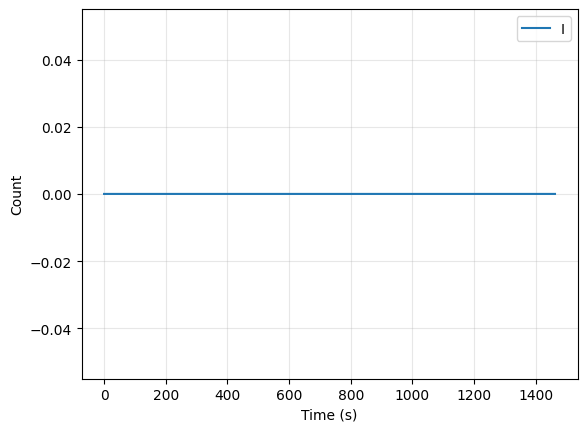

In [59]:
plot_file('0.0uM_1-2023-12-30-22-51-16.hdf5', species=['I'])

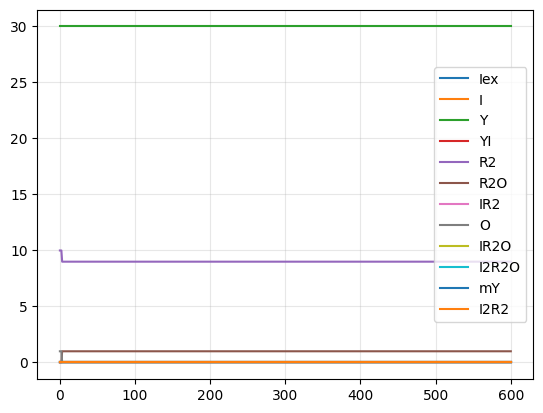

In [43]:
plot_file('0.0uM_2-2023-12-30-22-51-16.hdf5')

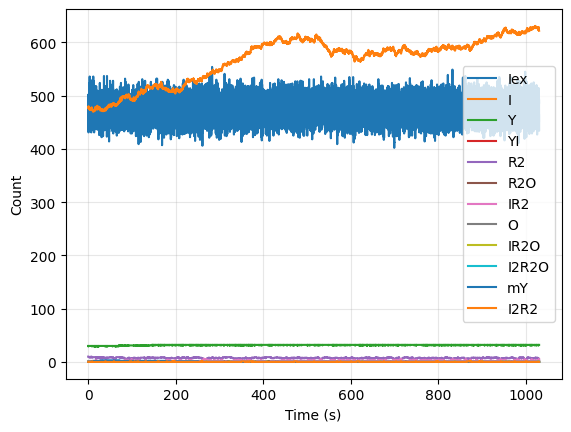

In [60]:
plot_file('0.5uM_1-2023-12-30-22-51-20.hdf5')

In [63]:
set(mol_to_id.keys()) - set(['Iex', 'I'])

{'I2R2', 'I2R2O', 'IR2', 'IR2O', 'O', 'R2', 'R2O', 'Y', 'YI', 'mY'}

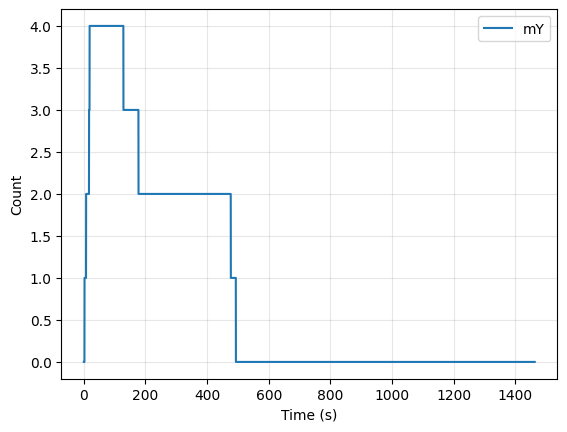

In [72]:
plot_file('0.0uM_1-2023-12-30-22-51-16.hdf5', ['mY'])

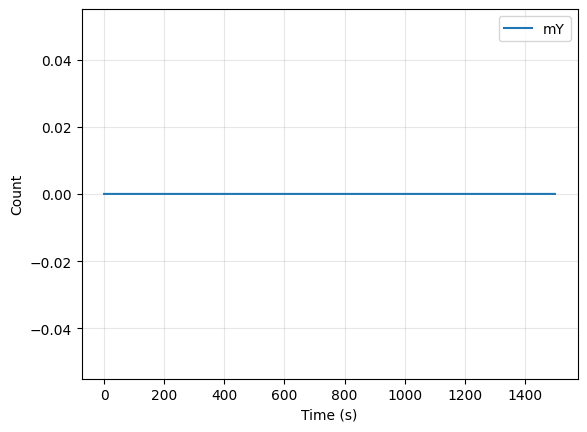

In [73]:
plot_file('0.0uM_2-2023-12-30-22-51-16.hdf5', ['mY'])

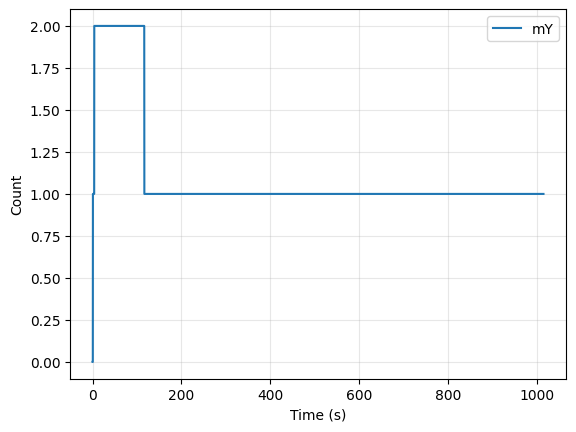

In [65]:
plot_file('0.5uM_2-2023-12-30-22-51-20.hdf5', ['mY'])

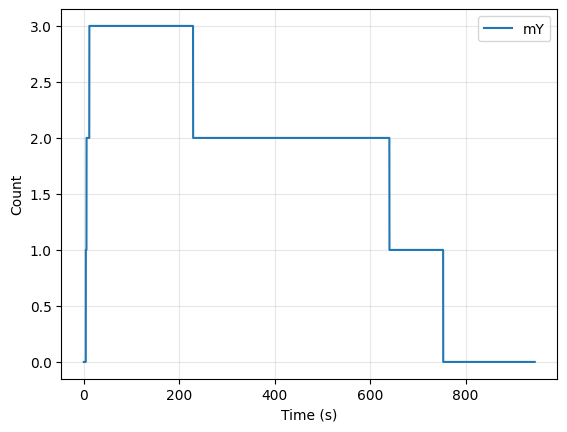

In [66]:
plot_file('5.0uM_1-2023-12-30-22-51-23.hdf5', ['mY'])

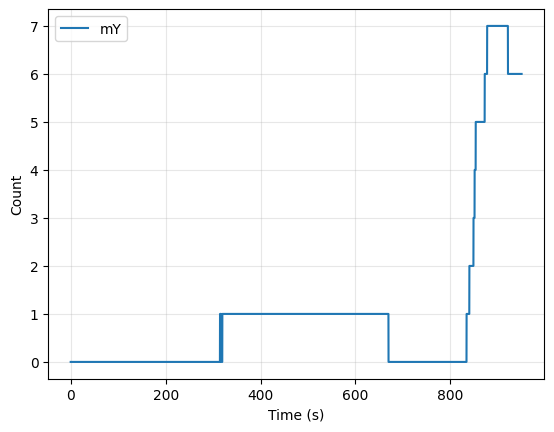

In [67]:
plot_file('5.0uM_2-2023-12-30-22-51-23.hdf5', ['mY'])

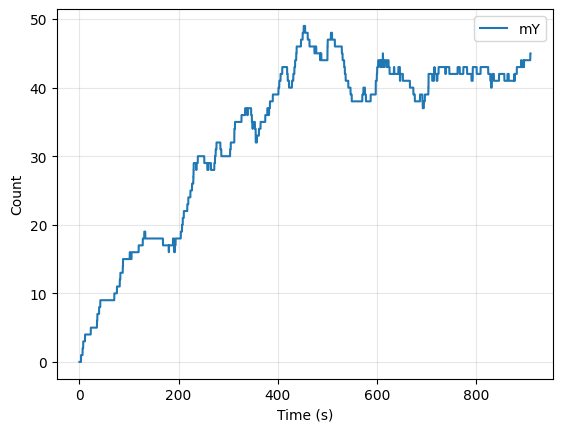

In [68]:
plot_file('50.0uM_1-2023-12-30-22-51-27.hdf5', ['mY'])

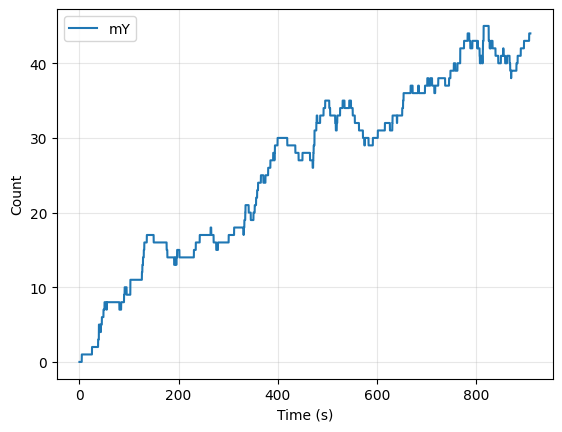

In [69]:
plot_file('50.0uM_2-2023-12-30-22-51-27.hdf5', ['mY'])

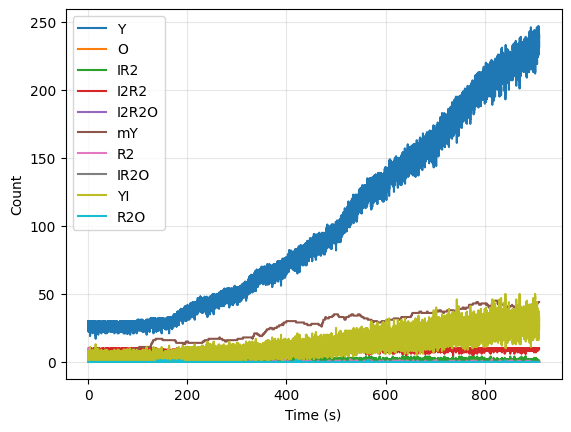

In [70]:
plot_file('50.0uM_2-2023-12-30-22-51-27.hdf5', set(mol_to_id.keys()) - set(['Iex', 'I']))

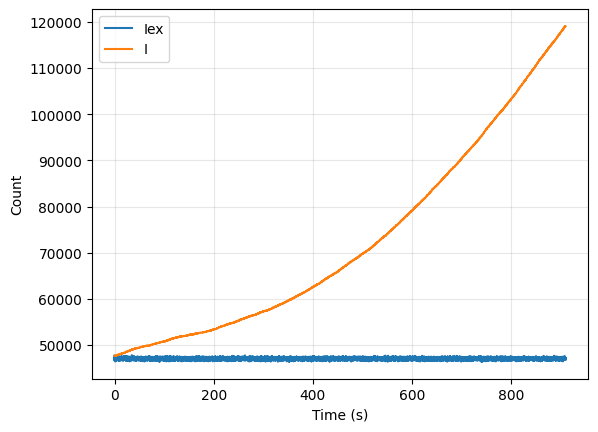

In [71]:
plot_file('50.0uM_2-2023-12-30-22-51-27.hdf5', set(['Iex', 'I']))

In [ ]:
def plot_time_trace(species, time_step, record_freq):
    for s in species:
        plt.plot(np.arange(len(traj))*record_freq*time_step, traj[:, b.mol_to_id[s]].sum((1, 2, 3)), label=s)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.xlabel('Time (s)')
    plt.ylabel('Count')

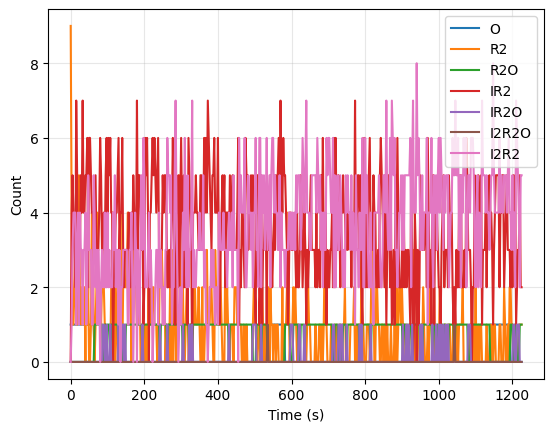

In [11]:
plot_time_trace(['O', 'R2', 'R2O', 'IR2', 'IR2O', 'I2R2O', 'I2R2'], 50e-6, 50000)

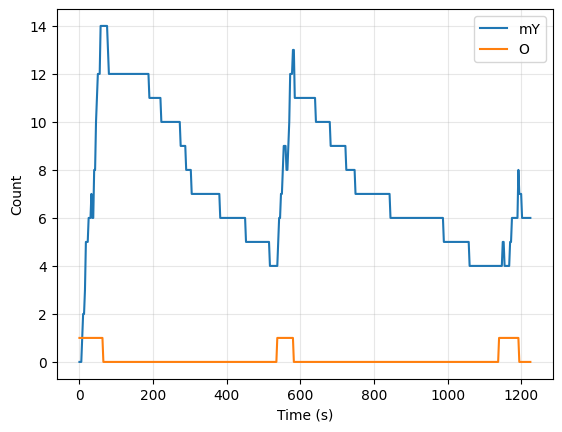

In [14]:
plot_time_trace(['mY', 'O'], 50e-6, 50000)

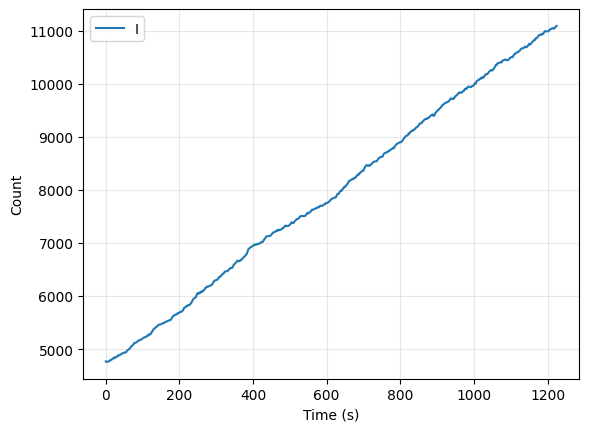

In [10]:
plot_time_trace(['I'], 50e-6, 50000)

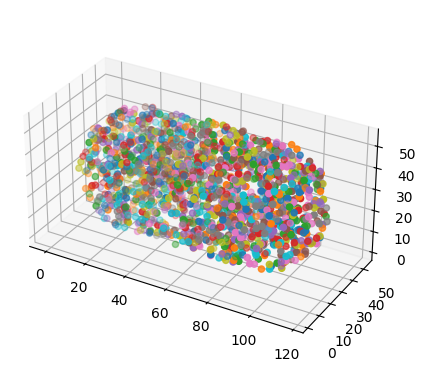

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for idx, frame in enumerate(traj[:, b.mol_to_id['mY']]):
    loc = np.where(frame)
    ax.scatter(loc[0], loc[1], loc[2])
xs, ys, zs = [b.mesh[x].get() for x in range(b.ndim)]
ax.set_box_aspect((np.ptp(xs), np.ptp(ys), np.ptp(zs)))